In [1]:
# sklearn转化器

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris['data'],iris['target'],test_size= 0.2,stratify= iris['target'])

In [4]:
min_max_scaler = MinMaxScaler().fit(X_train)#生成转换器

In [5]:
min_max_scaler.transform(X_train)#转换数据
#在 `fit` 方法中，scaler 学习了数据集 `X` 中每个特征的最大值 (`max_`) 和最小值 (`min_`)。
#之后，使用 `transform` 方法，它将每个特征的原始值减去最小值，然后除以最大值和最小值
#从而得到缩放后的值。
#MinMaxScaler().fit_transform(X_train)  两函数合并

array([[0.33333333, 0.16666667, 0.47457627, 0.41666667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.72222222, 0.5       , 0.79661017, 0.91666667],
       [0.80555556, 0.66666667, 0.86440678, 1.        ],
       [0.55555556, 0.20833333, 0.66101695, 0.58333333],
       [0.80555556, 0.41666667, 0.81355932, 0.625     ],
       [0.13888889, 0.58333333, 0.15254237, 0.04166667],
       [0.77777778, 0.41666667, 0.83050847, 0.83333333],
       [0.30555556, 0.58333333, 0.08474576, 0.125     ],
       [0.69444444, 0.5       , 0.83050847, 0.91666667],
       [0.55555556, 0.58333333, 0.77966102, 0.95833333],
       [0.55555556, 0.375     , 0.77966102, 0.70833333],
       [0.58333333, 0.33333333, 0.77966102, 0.83333333],
       [0.58333333, 0.45833333, 0.76271186, 0.70833333],
       [0.22222222, 0.75      , 0.15254237, 0.125     ],
       [0.83333333, 0.375     , 0.89830508, 0.70833333],
       [0.61111111, 0.5       , 0.69491525, 0.79166667],
       [0.02777778, 0.5       ,

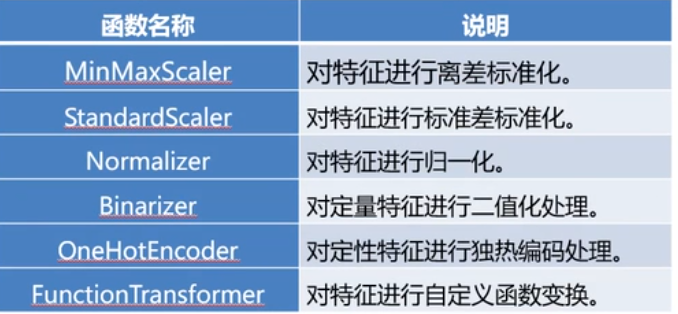

In [6]:
# 构建并评价聚类模型

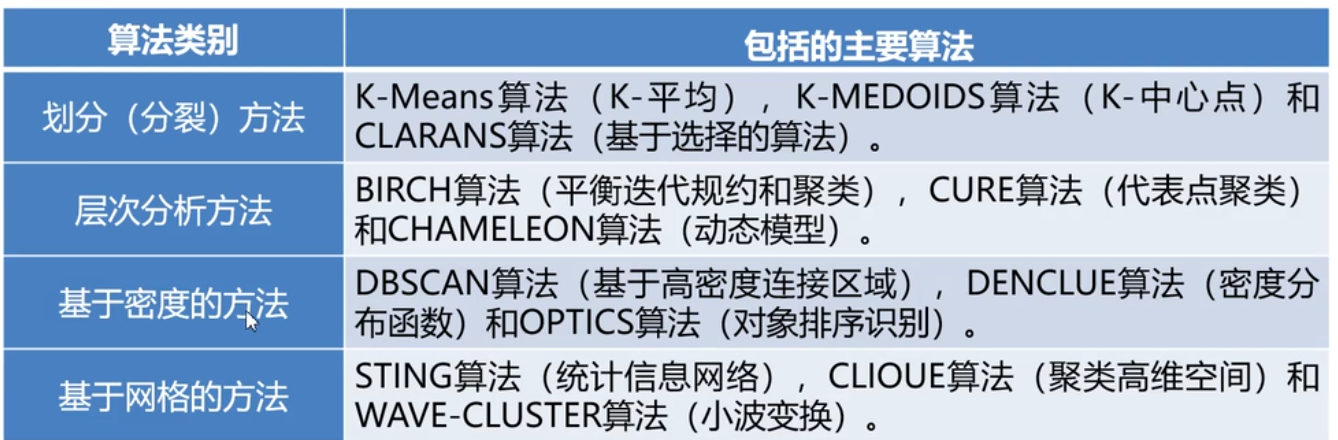

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
kmeans=KMeans(n_clusters = 3,n_init = 10)
# kmeans.fit(iris['data'])
kmeans.fit(iris['data'])#执行聚类操作

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
kmeans.labels_
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
from sklearn.metrics import adjusted_rand_score,silhouette_score#兰德系数，轮廓系数
adjusted_rand_score(iris['target'],kmeans.labels_)#实际的标签与预测的标签为参数

0.7302382722834697

In [10]:
silhouette_score(iris['data'],kmeans.labels_)#实际的数据与预测的标签为参数

0.5528190123564094

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


iris聚类%d类轮廓系数：%f 2 0.6810461692117462
iris聚类%d类轮廓系数：%f 3 0.5528190123564094


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


iris聚类%d类轮廓系数：%f 4 0.49805050499728737
iris聚类%d类轮廓系数：%f 5 0.48874888709310566


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


iris聚类%d类轮廓系数：%f 6 0.3648340039670026


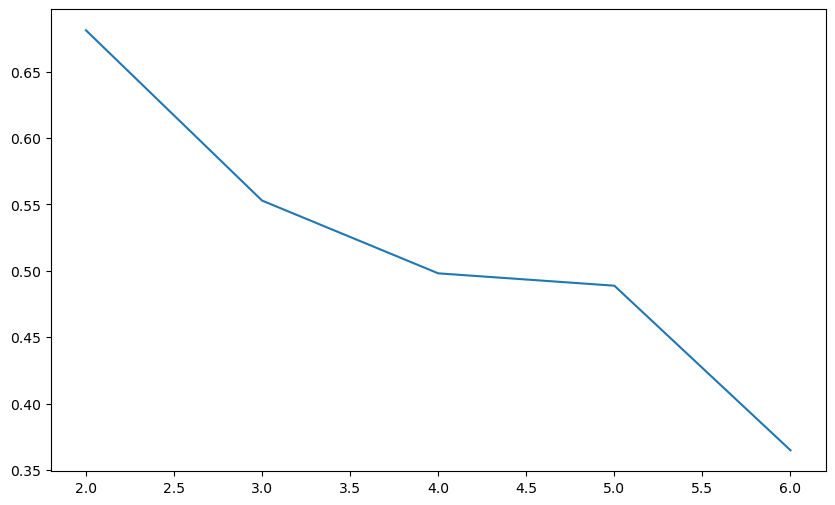

In [11]:
import matplotlib.pyplot as plt
scores = []

for i in range(2,7):
    kmeans = KMeans(n_clusters =i,n_init = 10)
    kmeans.fit(iris['data'])
    #kmeans = KMeans(n_clusters =i,n_init = 10).fit(iris['data'])
    score = silhouette_score(iris['data'],kmeans.labels_)
    scores.append(score)
    print('iris聚类%d类轮廓系数：%f',i,score)

plt.figure(figsize=(10,6))
plt.plot(range(2,7),scores,linewidth=1.5,linestyle='-')
plt.show()


In [12]:
#评价分类模型

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [14]:
iris = load_iris(return_X_y=True )
'''将特征数据存储在`X`中，将目标类别存储在`y`中。
`return_X_y=True`参数确保数据集被解包为单独的`X`和`y`变量。
如果你想要直接获取包含数据和标签的数据框，可以不设置这个参数，它默认就是True。'''

'将特征数据存储在`X`中，将目标类别存储在`y`中。\n`return_X_y=True`参数确保数据集被解包为单独的`X`和`y`变量。\n如果你想要直接获取包含数据和标签的数据框，可以不设置这个参数，它默认就是True。'

In [15]:
X = iris[0]
y = iris[1]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,stratify= y)

In [17]:
clf = DecisionTreeClassifier()#实例化分类器
clf.fit(X_train,y_train)#进行训练

DecisionTreeClassifier()

In [18]:
print(clf.classes_)
print(clf.feature_importances_)
print(clf.n_classes_)
print(clf.max_features_)

[0 1 2]
[0.03333333 0.         0.5607589  0.40590776]
3
4


In [19]:
predicted = clf.predict(X_test)

In [20]:
print(predicted)
print(y_test)

(predicted == y_test).mean()

[2 1 2 0 1 2 2 2 0 2 1 2 2 0 1 2 0 1 0 1 1 1 0 0 0 0 0 1 2 1]
[2 1 2 0 1 2 2 2 0 2 1 2 2 0 1 2 0 1 0 1 1 1 0 0 0 0 0 1 2 1]


1.0

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))#print规范化输出值

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
#构建并评价回归模型
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [23]:
boston = load_boston()

E:\Anaconda\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

In [24]:
print(boston['data'].shape)

(506, 13)


In [25]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [26]:
X_train,X_test,y_train,y_test=train_test_split(boston['data'],boston['target'],test_size=0.2)
#回归模型无需分层抽样

In [27]:
model = LinearRegression().fit(X_train,y_train)#模型训练

In [28]:
model.coef_#各元素对应的系数

array([-1.03943322e-01,  4.11165256e-02,  1.10074839e-02,  2.57894596e+00,
       -1.42041679e+01,  3.81513023e+00,  1.56032220e-03, -1.41901773e+00,
        3.08717411e-01, -1.31284186e-02, -9.47008597e-01,  1.23025613e-02,
       -5.59220445e-01])

In [29]:
model.rank_

13

In [30]:
model.intercept_#截距

33.90786559566554

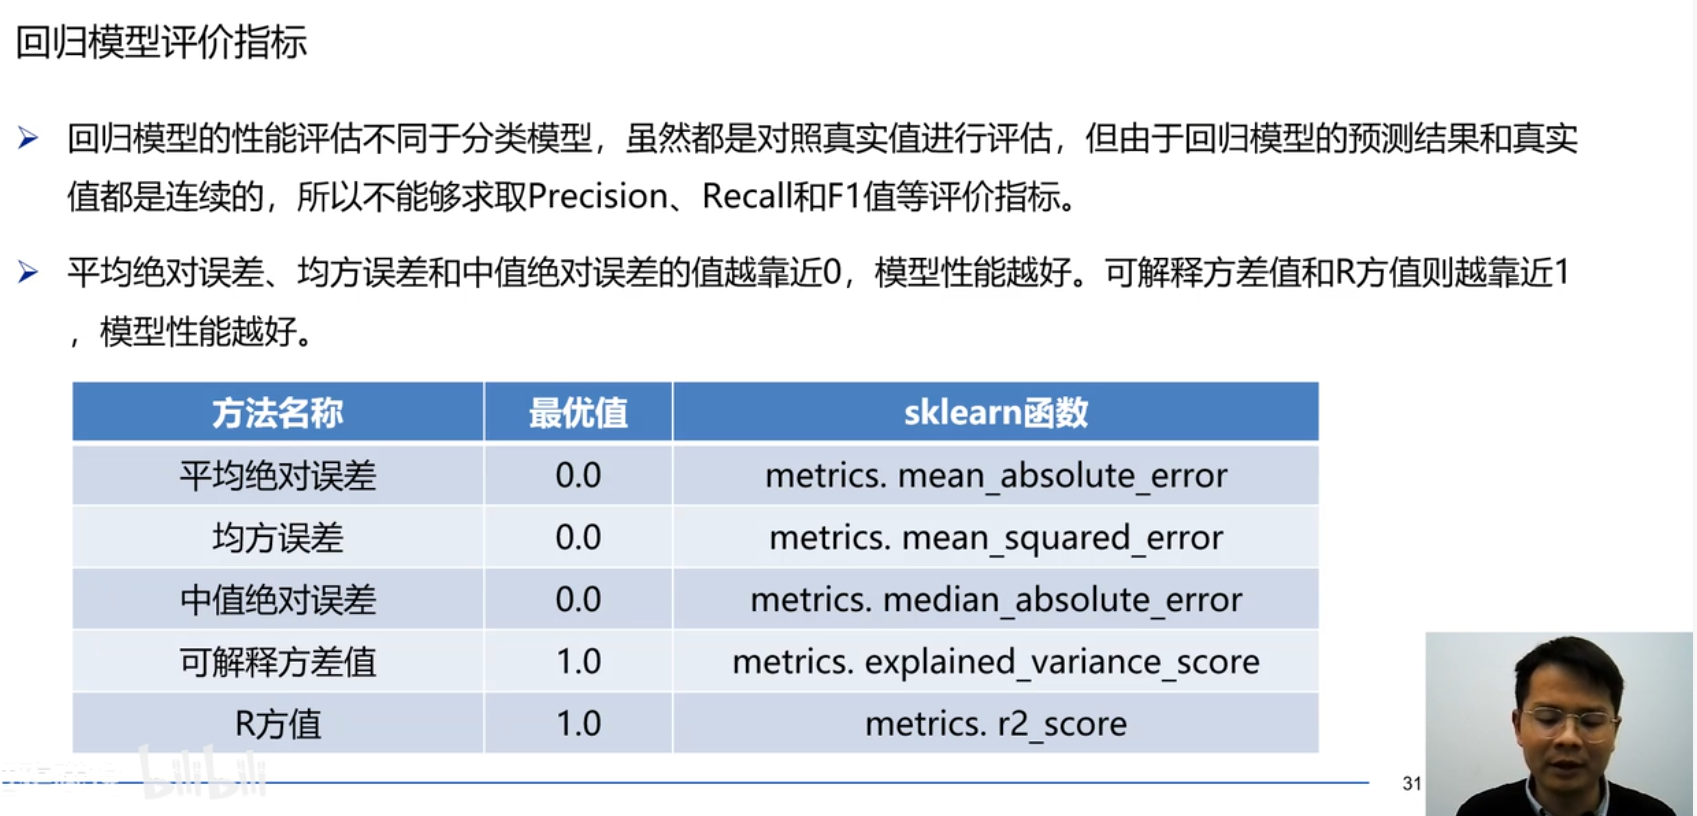

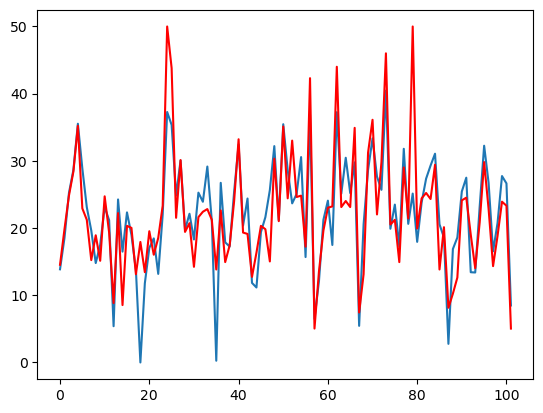

In [31]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)

plt.figure()
plt.plot(range(len(y_test)),predicted)
plt.plot(range(len(y_test)),y_test,'r-')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predicted)

26.316262978292382